In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
folder_list=os.listdir("Image/darkspots")

In [3]:
folder_list

['DarkSpots', 'NoDarkSpots']

In [4]:
features_train=[]
target_train=[]
for folder in folder_list:
    ImgNames_list=os.listdir("Image/darkspots"+"/"+folder)
    print("In Folder : ",folder)
    for imgName in ImgNames_list:
        Imgarr=cv2.imread("Image/darkspots"+"/"+folder+"/"+imgName)
        # there might be images of size less than 100 by 100 and so error occurs
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
        except: # we need to write atleast one line of code
            pass
        else:
            features_train.append(Imgarr)
            if folder=="NoDarkSpots":
                target_train.append(0)
            else:
                target_train.append(1)

In Folder :  DarkSpots
In Folder :  NoDarkSpots


In [5]:
features_train=np.array(features_train)
target_train=np.array(target_train)

In [6]:
features_train.shape

(380, 100, 100, 3)

In [7]:
target_train.shape

(380,)

In [8]:
features_train.ndim

4

In [9]:
target_train.ndim

1

In [10]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [11]:
features_train=np.array(list(map(preprocessing,features_train)))

In [12]:
features_train.shape

(380, 100, 100)

In [13]:
features_train=features_train.reshape(380, 100, 100,1)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [16]:
dataGen.fit(features_train)

In [17]:
batches=dataGen.flow(features_train,target_train,batch_size=5)

In [18]:
len(batches)

76

In [19]:
images,labels=next(batches)

In [20]:
images.ndim

4

In [21]:
labels.shape

(5,)

In [22]:
images.shape

(5, 100, 100, 1)

In [23]:
import matplotlib.pyplot as plt

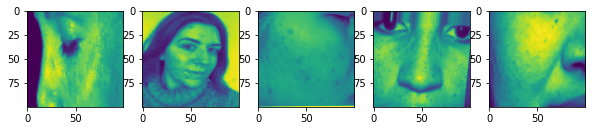

In [24]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()

In [25]:
features_train.shape

(380, 100, 100, 1)

In [26]:
target_train.shape

(380,)

In [27]:
from keras.utils.np_utils import to_categorical

In [28]:
target_train=to_categorical(target_train)

In [29]:
target_train.shape

(380, 2)

In [30]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [31]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.5)) # for overfitting model

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) 

In [32]:
from keras.optimizers import Adam

In [33]:
model.compile(Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
model.fit(dataGen.flow(features_train,target_train,batch_size=5),epochs=10)

Epoch 1/10
76/76 [==============================] - 40s 372ms/step - loss: 0.5258 - accuracy: 0.7596
Epoch 2/10
76/76 [==============================] - 29s 382ms/step - loss: 0.3330 - accuracy: 0.8988
Epoch 3/10
76/76 [==============================] - 32s 415ms/step - loss: 0.2571 - accuracy: 0.8727
Epoch 4/10
76/76 [==============================] - 30s 389ms/step - loss: 0.2213 - accuracy: 0.9276
Epoch 5/10
76/76 [==============================] - 30s 396ms/step - loss: 0.1920 - accuracy: 0.9197
Epoch 6/10
76/76 [==============================] - 29s 383ms/step - loss: 0.1896 - accuracy: 0.9264
Epoch 7/10
76/76 [==============================] - 29s 385ms/step - loss: 0.1531 - accuracy: 0.9481
Epoch 8/10
76/76 [==============================] - 30s 388ms/step - loss: 0.1997 - accuracy: 0.9141
Epoch 9/10
76/76 [==============================] - 29s 384ms/step - loss: 0.1433 - accuracy: 0.9607
Epoch 10/10
76/76 [==============================] - 29s 388ms/step - loss: 0.1393 - accura

In [35]:
model_json=model.to_json() # converted to json file
with open("DarkSpots.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("DarkSpotsWeights.h5") # saving weights as hdf 5 file
print("Save the Model")

Save the Model


In [36]:
from keras.models import model_from_json
json_file=open("DarkSpots.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("DarkSpotsWeights.h5")
print("Loaded model successfully")

Loaded model successfully


In [37]:
def getClassName(classNo):
    if classNo == 0: return "No Dark Spots"
    elif classNo == 1: return "Dark Spots"

In [38]:
import cv2
image=cv2.imread("cricket.jpg")

In [39]:
cv2.imshow("cricket",image)
cv2.waitKey(5000)
cv2.destroyAllWindows()